<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [6]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [307]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [15]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [18]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [20]:
data  = requests.get(url).text

In [22]:
soup = BeautifulSoup(data,"html.parser")

In [24]:
#busca todas las tablas html en la página web
# en html la tabla está representada por la etiqueta <table>
tables = soup.find_all('table') 

In [32]:
pd.read_html(str(tables[3]), flavor='bs4')

[                Stock Name        Country Market Cap  PE Ratio
 0      General Motors (GM)  United States   $53.930B      5.56
 1           Ford Motor (F)  United States   $52.668B      8.09
 2    Harley-Davidson (HOG)  United States    $6.762B      9.56
 3            Polaris (PII)  United States    $6.267B     11.86
 4                IAA (IAA)  United States    $5.134B     16.40
 5             Fisker (FSR)  United States    $2.261B      0.00
 6      Lion Electric (LEV)         Canada    $0.551B      0.00
 7             Volta (VLTA)  United States    $0.071B      0.00
 8       Bird Global (BRDS)  United States    $0.054B      0.00
 9  Lightning EMotors (ZEV)  United States    $0.043B      0.00]

In [34]:
tesla_data_read_html = pd.read_html(str(tables[3]), flavor='bs4')[0]

tesla_data_read_html

,Stock Name,Country,Market Cap,PE Ratio
0,General Motors (GM),United States,$53.930B,5.56
1,Ford Motor (F),United States,$52.668B,8.09
2,Harley-Davidson (HOG),United States,$6.762B,9.56
3,Polaris (PII),United States,$6.267B,11.86
4,IAA (IAA),United States,$5.134B,16.40
5,Fisker (FSR),United States,$2.261B,0.00
6,Lion Electric (LEV),Canada,$0.551B,0.00
7,Volta (VLTA),United States,$0.071B,0.00
8,Bird Global (BRDS),United States,$0.054B,0.00
9,Lightning EMotors (ZEV),United States,$0.043B,0.00


In [36]:
tesla_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [40]:
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [317]:
tesla_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3616,2024-11-08 00:00:00-05:00,299.140015,328.709991,297.660004,321.220001,204782800,0.0,0.0
3617,2024-11-11 00:00:00-05:00,346.299988,358.640015,336.000000,350.000000,210521600,0.0,0.0
3618,2024-11-12 00:00:00-05:00,342.739990,345.839996,323.309998,328.489990,155726000,0.0,0.0
3619,2024-11-13 00:00:00-05:00,335.850006,344.600006,322.500000,330.239990,125405600,0.0,0.0
3620,2024-11-14 00:00:00-05:00,327.690002,329.980011,310.369995,311.179993,119921600,0.0,0.0


In [42]:
tesla_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

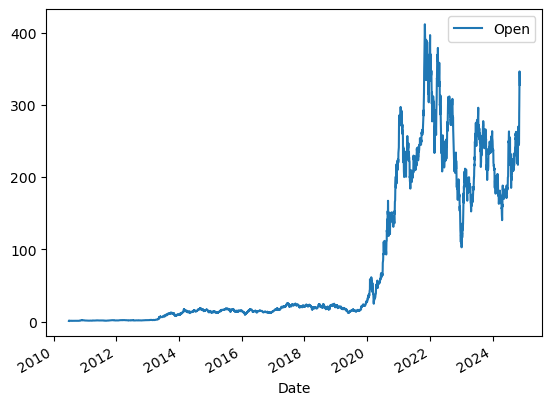

In [44]:
tesla_data.plot(x="Date", y="Open")

## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [49]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [51]:
html_data  = requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [80]:
soup1 = BeautifulSoup(html_data,"html.parser")

In [82]:
print(soup1.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Tesla Revenue 2010-2022 | TSLA | MacroTrends
  </title>
  <meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter end

In [88]:
tables = soup1.find_all('table') 

In [90]:
len(tables)

6

In [92]:
for link in soup1.find_all('a',href=True):  # En HTML, el ancla o enlace se representa mediante la etiqueta <a>

    print(link.get('href'))

https://www.macrotrends.net
/stocks/stock-screener
/stocks/research
/charts/stock-indexes
/charts/precious-metals
/charts/energy
/charts/commodities
/charts/exchange-rates
/charts/interest-rates
/charts/economy
/countries/topic-overview
https://www.macrotrends.net/stocks/charts/TSLA/tesla/stock-price-history
https://www.macrotrends.net/stocks/charts/TSLA/tesla/financial-statements
https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue
https://www.macrotrends.net/stocks/charts/TSLA/tesla/total-assets
https://www.macrotrends.net/stocks/charts/TSLA/tesla/profit-margins
https://www.macrotrends.net/stocks/charts/TSLA/tesla/pe-ratio
https://www.macrotrends.net/stocks/charts/TSLA/tesla/current-ratio
https://www.macrotrends.net/stocks/charts/TSLA/tesla/dividend-yield-history
https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue
https://www.macrotrends.net/stocks/charts/TSLA/tesla/gross-profit
https://www.macrotrends.net/stocks/charts/TSLA/tesla/operating-income
https://www.macrotr

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [122]:
# crea tabla con columnas "DateRevenue", "TeslaRevenue"
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [176]:
tesla_revenue

,Date,Revenue


In [124]:
pd.read_html(str(tables[1]), flavor='bs4')

[   Tesla Quarterly Revenue (Millions of US $)  \
 0                                  2022-09-30   
 1                                  2022-06-30   
 2                                  2022-03-31   
 3                                  2021-12-31   
 4                                  2021-09-30   
 5                                  2021-06-30   
 6                                  2021-03-31   
 7                                  2020-12-31   
 8                                  2020-09-30   
 9                                  2020-06-30   
 10                                 2020-03-31   
 11                                 2019-12-31   
 12                                 2019-09-30   
 13                                 2019-06-30   
 14                                 2019-03-31   
 15                                 2018-12-31   
 16                                 2018-09-30   
 17                                 2018-06-30   
 18                                 2018-03-31   


In [126]:
tesla_data_read_html = pd.read_html(str(tables[1]), flavor='bs4')[0]

tesla_data_read_html

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"
5,2021-06-30,"$11,958"
6,2021-03-31,"$10,389"
7,2020-12-31,"$10,744"
8,2020-09-30,"$8,771"
9,2020-06-30,"$6,036"


In [185]:
# Primero aislamos el cuerpo de la tabla que contiene toda la información
# Luego recorremos cada fila y encontramos todos los valores de columna para cada fila
# para indicar la tabla ('tbody').[1]
# ("tbody").find_all('tr'): recorre todo
for row in soup1.find("tbody").find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text
    
    # Finalmente agregamos los datos de cada fila a la tabla.
    tesla_revenue = pd.concat([tesla_data_read_html,pd.DataFrame({"Tesla Quarterly Revenue (Millions of US $)":[Date], "Tesla Quarterly Revenue (Millions of US $).1":[Revenue]})], ignore_index=True) 

In [188]:
tesla_revenue.head()

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [196]:
tesla_revenue["Tesla Quarterly Revenue (Millions of US $)"] = tesla_revenue['Tesla Quarterly Revenue (Millions of US $)'].str.replace(',|\$',"")

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\temp\ipykernel_12348\3150443780.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Tesla Quarterly Revenue (Millions of US $)"] = tesla_revenue['Tesla Quarterly Revenue (Millions of US $)'].str.replace(',|\$',"")


Execute the following lines to remove an null or empty strings in the Revenue column.


In [198]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Tesla Quarterly Revenue (Millions of US $)'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [200]:
tesla_revenue.head()

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [202]:
GameStop = yf.Ticker('GME')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [204]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [209]:
data2  = requests.get(url2).text
print(data2)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

In [211]:
soup2 = BeautifulSoup(data2,"html.parser")

In [213]:
tables = soup2.find_all('table') 

In [215]:
len(tables)

6

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [233]:
pd.read_html(str(tables[3]), flavor='bs4')

[                     Stock Name        Country Market Cap  PE Ratio
 0                Best Buy (BBY)  United States   $27.033B     18.16
 1                Aaron's, (AAN)  United States    $3.975B     15.14
 2  GOME Retail Holdings (GMELY)          China    $1.684B      0.00
 3                Systemax (SYX)  United States    $0.873B     18.34
 4                 Conn's (CONN)  United States    $0.325B      0.00
 5     Taitron Components (TAIT)  United States    $0.016B     10.50]

In [238]:
gme_data = pd.read_html(str(tables[3]), flavor='bs4')[0]

gme_data

,Stock Name,Country,Market Cap,PE Ratio
0,Best Buy (BBY),United States,$27.033B,18.16
1,"Aaron's, (AAN)",United States,$3.975B,15.14
2,GOME Retail Holdings (GMELY),China,$1.684B,0.00
3,Systemax (SYX),United States,$0.873B,18.34
4,Conn's (CONN),United States,$0.325B,0.00
5,Taitron Components (TAIT),United States,$0.016B,10.50


In [242]:
gme_data1 = pd.DataFrame(columns=["Nombre Acción", "Pais", "Capitalización de mercado", "Relación PE"])

In [250]:
for row in soup2.find("tbody").find_all('tr'):
    col = row.find_all("td")
    NombreAcción = col[0].text
    Pais = col[1].text
    Capitalizacióndemercado = col[1].text
    RelaciónPE = col[1].text
    
    # Finalmente agregamos los datos de cada fila a la tabla.
    gme_data1 = pd.concat([gme_data,pd.DataFrame({"Nombre de la acción":[NombreAcción], "País":[Pais],"Capitalización de mercado":[Capitalizacióndemercado],"Relación PE":[RelaciónPE]})], ignore_index=True)

In [252]:
gme_data1 .head()

,Stock Name,Country,Market Cap,PE Ratio,Nombre de la acción,País,Capitalización de mercado,Relación PE
0,Best Buy (BBY),United States,$27.033B,18.16,NaN,NaN,NaN,NaN
1,"Aaron's, (AAN)",United States,$3.975B,15.14,NaN,NaN,NaN,NaN
2,GOME Retail Holdings (GMELY),China,$1.684B,0.00,NaN,NaN,NaN,NaN
3,Systemax (SYX),United States,$0.873B,18.34,NaN,NaN,NaN,NaN
4,Conn's (CONN),United States,$0.325B,0.00,NaN,NaN,NaN,NaN


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [254]:
url3 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [257]:
html_data2  = requests.get(url3).text

In [258]:
soup3 = BeautifulSoup(html_data2,"html.parser")

In [259]:
print(soup3.prettify())

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style="">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript">
  </script>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript">
  </script>
  <s

In [265]:
tables = soup3.find_all('table') 

In [267]:
len(tables)

6

In [271]:
# crea tabla con columnas "Date", "Revenue"
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
gme_revenue

,Date,Revenue


In [273]:
pd.read_html(str(tables[1]), flavor='bs4')

[   GameStop Quarterly Revenue (Millions of US $)  \
 0                                     2020-04-30   
 1                                     2020-01-31   
 2                                     2019-10-31   
 3                                     2019-07-31   
 4                                     2019-04-30   
 ..                                           ...   
 57                                    2006-01-31   
 58                                    2005-10-31   
 59                                    2005-07-31   
 60                                    2005-04-30   
 61                                    2005-01-31   
 
    GameStop Quarterly Revenue (Millions of US $).1  
 0                                           $1,021  
 1                                           $2,194  
 2                                           $1,439  
 3                                           $1,286  
 4                                           $1,548  
 ..                                   

In [277]:
gme_data2 = pd.read_html(str(tables[1]), flavor='bs4')[0]

gme_data2

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"
...,...,...
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


In [292]:
for row in soup3.find("tbody").find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text
    
    # Finalmente agregamos los datos de cada fila a la tabla.
    gme_revenue = pd.concat([gme_data2,pd.DataFrame({"Ingresos trimestrales de GameStop (millones de US $))":[Date],"Ingresos trimestrales de GameStop (millones de dólares estadounidenses).1":[Revenue]})], ignore_index=True)

In [294]:
gme_revenue

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1,Ingresos trimestrales de GameStop (millones de US $)),Ingresos trimestrales de GameStop (millones de dólares estadounidenses).1
0,2020-04-30,"$1,021",NaN,NaN
1,2020-01-31,"$2,194",NaN,NaN
2,2019-10-31,"$1,439",NaN,NaN
3,2019-07-31,"$1,286",NaN,NaN
4,2019-04-30,"$1,548",NaN,NaN
...,...,...,...,...
58,2005-10-31,$534,NaN,NaN
59,2005-07-31,$416,NaN,NaN
60,2005-04-30,$475,NaN,NaN
61,2005-01-31,$709,NaN,NaN


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [319]:
gme_revenue.tail()

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1,Ingresos trimestrales de GameStop (millones de US $)),Ingresos trimestrales de GameStop (millones de dólares estadounidenses).1
58,2005-10-31,$534,NaN,NaN
59,2005-07-31,$416,NaN,NaN
60,2005-04-30,$475,NaN,NaN
61,2005-01-31,$709,NaN,NaN
62,NaN,NaN,2005,"$1,843"


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


<Axes: xlabel='Date'>

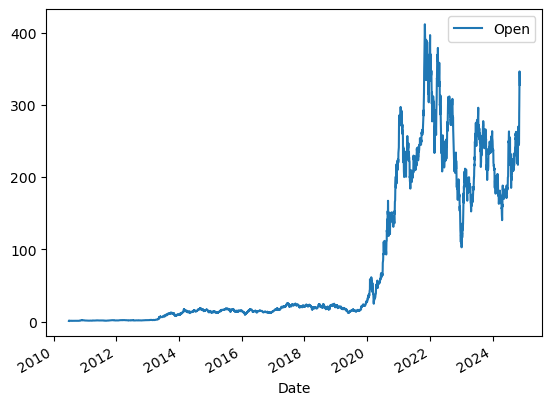

In [301]:
tesla_data.plot(x="Date", y="Open")

In [328]:
def make_graph(stock_data, revenue_data, stock):    

SyntaxError: incomplete input (2537856571.py, line 2)

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


In [330]:
gme_data2.plot(x="Date", y="Open")

KeyError: 'Date'

<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
